# Creating a df with the paths

In [43]:
import pandas as pd
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt

In [34]:
apple_path = 'Data/Apple'
banana_path = 'Data/Banana'
carambola_path = 'Data/Carambola'
guava_path = 'Data/Guava'
kiwi_path = 'Data/Kiwi'
mango_path = 'Data/Mango'
muskmelon_path = 'Data/muskmelon'
orange_path = 'Data/Orange'
peach_path =  'Data/Peach'
pear_path = 'Data/Pear'
persimmon_path = 'Data/Persimmon'
pitaya_path = 'Data/Pitaya'
plum_path = 'Data/Plum'
pomegranate_path = 'Data/Pomegranate'
tomatoes_path = 'Data/Tomatoes'


In [35]:
list_of_paths = [apple_path, banana_path, carambola_path, guava_path,
                kiwi_path, mango_path, muskmelon_path, orange_path,
                peach_path, pear_path, persimmon_path, pitaya_path,
                plum_path, pomegranate_path, tomatoes_path]

In [36]:
list_of_paths[0]

'Data/Apple'

In [37]:
def data_frame_gen(list_of_paths):
    all_files = []
    for path in list_of_paths:
        
        for dirpath, _, filenames in os.walk(path):
            for fn in filenames:
                all_files.append(os.path.join(dirpath, fn))
    
    img_df = pd.DataFrame({'Path': all_files})
    
    img_df['Fruit'] = img_df['Path'].apply(lambda p: p.split(os.sep)[1])
    img_df = img_df[['Fruit', 'Path']]            
    
    return img_df


In [38]:
df = data_frame_gen(list_of_paths)

In [39]:
df.groupby('Fruit').count()


,Path
Fruit,
Apple,11186
Banana,3027
Carambola,2080
Guava,19699
Kiwi,8466
Mango,4154
Orange,3012
Peach,2629
Pear,3012


[[[ 33  39  39]
  [ 35  41  41]
  [ 37  42  42]
  ...
  [ 41  48  41]
  [ 86  94  87]
  [104 112 105]]

 [[ 40  46  44]
  [ 42  48  46]
  [ 38  45  45]
  ...
  [ 42  49  42]
  [ 73  81  74]
  [100 108 101]]

 [[ 39  40  38]
  [ 44  45  42]
  [ 32  41  45]
  ...
  [ 48  55  48]
  [ 54  62  55]
  [ 96 104  97]]

 ...

 [[ 10  16  18]
  [ 10  16  18]
  [ 12  18  20]
  ...
  [  5   6   2]
  [  9  10   8]
  [ 24  25  23]]

 [[  3   9  13]
  [  3   9  13]
  [  3   9  13]
  ...
  [  4   5   1]
  [  9  10   8]
  [ 24  25  23]]

 [[  6  12  17]
  [  6  12  17]
  [  5  11  16]
  ...
  [  3   4   0]
  [ 10  11   9]
  [ 28  30  27]]]


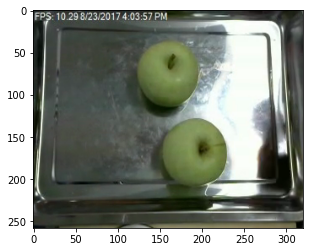

In [85]:
img = cv2.imread(df['Path'][1], cv2.COLOR_BGR2RGB)
img_GRB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_GRB)
print(img_GRB)
plt.show()

In [49]:
df.shape

(70552, 2)

In [54]:
df

,Fruit,Path
0,Apple,Data/Apple/.DS_Store
1,Apple,Data/Apple/Apple E/Apple E08152.png
2,Apple,Data/Apple/Apple E/Apple E117.png
3,Apple,Data/Apple/Apple E/Apple E103.png
4,Apple,Data/Apple/Apple E/Apple Ee01601.png
...,...,...
70547,Tomatoes,Data/Tomatoes/Tamotoes00485.png
70548,Tomatoes,Data/Tomatoes/Tamotoes001605.png
70549,Tomatoes,Data/Tomatoes/Tamotoes001611.png
70550,Tomatoes,Data/Tomatoes/Tamotoes001177.png


In [78]:
## Removing DS_store

for path in df.Path:
    count_to_drop = 0 
    if 'DS_Store'in str(path):
        df = df.drop(df.index[count_to_drop])
    count_to_drop = count_to_drop + 1
        

In [80]:
df

,Fruit,Path
3,Apple,Data/Apple/Apple E/Apple E103.png
4,Apple,Data/Apple/Apple E/Apple Ee01601.png
5,Apple,Data/Apple/Apple E/Apple E05112.png
6,Apple,Data/Apple/Apple E/Apple E301.png
7,Apple,Data/Apple/Apple E/Apple E05106.png
...,...,...
70547,Tomatoes,Data/Tomatoes/Tamotoes00485.png
70548,Tomatoes,Data/Tomatoes/Tamotoes001605.png
70549,Tomatoes,Data/Tomatoes/Tamotoes001611.png
70550,Tomatoes,Data/Tomatoes/Tamotoes001177.png


## Preping the data 

In [81]:
# Shuffling data

from sklearn.utils import shuffle

df = shuffle(df, random_state = 0)

df = df.reset_index(drop=True)

df

,Fruit,Path
0,Apple,Data/Apple/Apple F/Apple F179.png
1,Apple,Data/Apple/Apple D/Apple De03721.png
2,Kiwi,Data/Kiwi/Kiwi C/Kiwi C00674.png
3,Pomegranate,Data/Pomegranate/Pomegranet003.png
4,Guava,Data/Guava/Guava total/1Guava。2975 resized.png
...,...,...
70544,Guava,Data/Guava/guava B/Guava666.png
70545,Mango,Data/Mango/Mango003723.png
70546,Kiwi,Data/Kiwi/Kiwi C/Kiwi C00143.png
70547,Kiwi,Data/Kiwi/Kiwi B/Kiwi B00196.png


In [83]:
# adding a label to the data 

fruit_names = sorted(df.Fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
df["label"] = df["Fruit"].map(mapper_fruit_names)
print(mapper_fruit_names)

# Visualize the resulting dataframe
df.head()

{'Apple': 0, 'Banana': 1, 'Carambola': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Orange': 6, 'Peach': 7, 'Pear': 8, 'Persimmon': 9, 'Pitaya': 10, 'Plum': 11, 'Pomegranate': 12, 'Tomatoes': 13, 'muskmelon': 14}


,Fruit,Path,label
0,Apple,Data/Apple/Apple F/Apple F179.png,0
1,Apple,Data/Apple/Apple D/Apple De03721.png,0
2,Kiwi,Data/Kiwi/Kiwi C/Kiwi C00674.png,4
3,Pomegranate,Data/Pomegranate/Pomegranet003.png,12
4,Guava,Data/Guava/Guava total/1Guava。2975 resized.png,3


# Preping to model

In [86]:
# Reshaping the image

In [ ]:
def load_img(df):
# Load the images using their contained in the dataframe df
# Return a list of images and a list with the labels of the images
    img_paths = df["Path"].values
    img_labels = df["Fruit"].values
    X = []
    y = []
    
    for i,path in enumerate(img_paths):
        img =  cv2.imread(path)
        img = cv2.resize(img, (150,150))
        label = img_labels[i]
        X.append(img)
        y.append(label)
    return np.array(X),np.array(y)

X, y = load_img(df)

X